In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score

In [7]:
pred_df = pd.read_csv("C:\MCA\Project\Hospital Readmission\Dataset\Baseline_predictions.csv")
pred_df.shape

(13219, 2)

In [12]:
pred_df.sample(5)

,y_true,y_proba
2139,0,0.327579
7319,1,0.154993
275,1,0.609852
8752,0,0.179998
9583,0,0.082739


In [13]:
y_test = pred_df["y_true"]
y_proba = pred_df["y_proba"]

In [14]:
def threshold_analysis(y_true, y_proba, thresholds):
    records = []

    n_samples = len(y_true)

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        recall = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        flagged_pct = y_pred.mean() * 100

        records.append({
            "threshold": t,
            "recall": recall,
            "precision": precision,
            "%_patients_flagged": flagged_pct
        })

    return pd.DataFrame(records)

In [15]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6]

threshold_df = threshold_analysis(
    y_true=y_test,
    y_proba=y_proba,
    thresholds=thresholds
)

threshold_df

,threshold,recall,precision,%_patients_flagged
0,0.10,0.864308,0.207349,70.413798
1,0.20,0.492163,0.310364,26.787200
2,0.30,0.254814,0.389459,11.052273
3,0.40,0.154948,0.475275,5.507224
4,0.45,0.116883,0.499044,3.956426
5,0.50,0.094940,0.546392,2.935169
6,0.60,0.058218,0.607477,1.618882


In [16]:
def capacity_simulation(y_true, y_proba, capacities):
    results = []

    n = len(y_true)

    # Sort patients by risk score (descending)
    sorted_idx = np.argsort(-y_proba)
    y_true_sorted = y_true.iloc[sorted_idx]

    for cap in capacities:
        k = int(cap * n)
        flagged = y_true_sorted.iloc[:k]

        recall_at_cap = flagged.sum() / y_true.sum()
        precision_at_cap = flagged.mean()

        results.append({
            "capacity_%": cap * 100,
            "recall": recall_at_cap,
            "precision": precision_at_cap
        })

    return pd.DataFrame(results)

In [17]:
capacities = [0.10, 0.20, 0.30]

capacity_df = capacity_simulation(
    y_true=y_test,
    y_proba=y_proba,
    capacities=capacities
)

capacity_df

,capacity_%,recall,precision
0,10.0,0.236005,0.398940
1,20.0,0.398567,0.336739
2,30.0,0.532468,0.299874


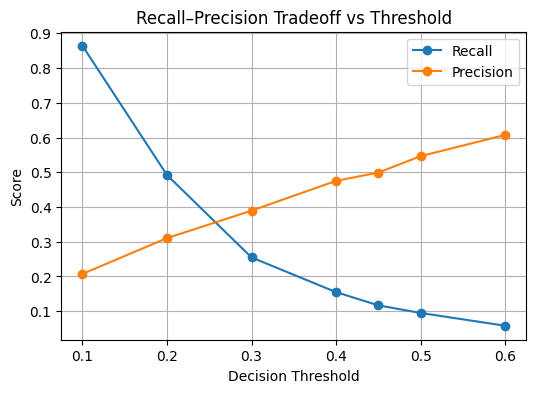

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(threshold_df["threshold"], threshold_df["recall"], marker="o", label="Recall")
plt.plot(threshold_df["threshold"], threshold_df["precision"], marker="o", label="Precision")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Recall–Precision Tradeoff vs Threshold")
plt.legend()
plt.grid(True)
plt.show()